# 실습 2차시 - Decision Tree

### 실습 제출 방법:

1.   '파일 > 드라이브에 사본 저장'으로 노트북 복사본을 만듭니다.
2.   제목 끝에 학번과 이름을 추가합니다. 예시) 실습 1차시_20XXXXXXXX_이름
3.   코랩 노트북의 모든 코드가 오류없이 돌아가도록 실습 활동을 완료합니다.
4.   블랙보드의 해당 실습 과제란에 '파일 > .ipynb로 다운로드'하여 노트북 파일을 제출하시면 됩니다.

이번 실습에서는 decision tree를 처음부터 구현해보도록 하겠습니다.



# Gini Impurity(지니 불순도)

지니 불순도는 decision tree의 분할기준 중 하나입니다.
예시를 보며 좀더 자세히 알아보도록 하겠습니다.

아래 두개의 트리를 살펴봅시다.

<img src=https://s3.amazonaws.com/codecademy-content/programs/data-science-path/decision-trees/comparison_1.svg width=300px><img src=https://s3.amazonaws.com/codecademy-content/programs/data-science-path/decision-trees/comparison_2.svg width=300px>

각 트리는 학생이 공부한 시간에 따른 성적을 나타냅니다. 파란색 공은 성적이 A인 학생, 그리고 노란색 공은 성적이 B인 학생입니다. 
둘 중 어느 트리가 학생이 성적 A를 받을 수 있을지 예측하는데에 더 유용할까요?

예를 들어 왼쪽 트리를 사용한다고 가정해봅시다. 양쪽 말단 노드에 각각 두 클래스가 섞여 있기 때문에(파란색과 노란색이 각각 섞여 들어있는것을 확인 할 수 있다), 레이블이 어떤것인지 확실하게 결정하기 어렵다는것을 알 수 있습니다.

반면 오른쪽 트리는 양쪽 말단 노드에 모두 하나의 클래스밖에 없기 때문에(각 노드마다 한 색깔의 공만 들어있는것을 알 수 있다) 레이블의 결정이 확실하게 됩니다. 따라서 오른쪽 트리를 사용할 경우에는 우리의 예측에 대해 확실함을 가질 수 있습니다.

다시 처음 질문으로 돌아가서, 둘 중 어느 트리가 학생이 성적을 더 높게 받을 수 있을지 예측하는데 유용할까요?

이 질문은 한 세트의 instance 들에 대해 `지니 불순도` 를 계산함으로써 답할 수 있습니다. 지니 불순도를 찾기 위해서는 `1`에서 시작해서 세트의 각 class 비율의 제곱을 빼면 됩니다. 예를 들어, `A` class인 instance가 3개 있고 `B` class인 instance가 1개 있는 데이터의 경우에는 지니 불순도는 아래와 같이 계산됩니다. 

$$1 - (3/4)^2 - (1/4)^2 = 0.375$$

만약 데이터가 하나의 class만 있다면, 지니 불순도는 `0`이 됩니다. 불순도가 낮으면 낮을수록 결정트리의 성능은 더 좋아집니다.

## 활동 1

In [ ]:
# 위의 왼쪽 결정트리의 왼쪽 끝마디노드의 지니 불순도 계산해봅시다.
1 - (4/6)**2 - (2/6)**2

0.4444444444444445

위에서 설명한 바와 같이, 1에서 각 세트의 각 class비율의 제곱을 뺐습니다. 

4/6 는 파란공의 비율, 2/6은 노란공의 비율로, 지니 불순도는
1-(4/6)의 제곱-(2/6)의 제곱이 됩니다


1. 아래의 `sample_labels` 리스트의 지니 불순도를 계산해보겠습니다. 
    
    먼저 `impurity`라는 변수를 선언하고 `1`을 저장합니다.


In [ ]:
sample_labels = ["unacc", "unacc", "acc", "acc", "good", "good"]
impurity = 1

2. 이제 sample labels에 포함되어있는 class가 각 몇개씩 들어있는지 세어보도록 하겠습니다.

    이는 파이썬의 `Counter` 오브젝트를 사용하여 이를 간편하게 할 수 있습니다.

    예를 들어, 아래와 같은 코드에서,
    ```py
    list = ["A", "A", "B"]
    counts = Counter(list)
    ```

    `counts` 변수는 아래 Counter object을 저장하고 있게 됩니다.
    ```py
    Counter({"A": 2, "B": 1})
    ```

In [ ]:
from collections import Counter # collections 모듈에서 Counter 클래스 임포트

# 1. `sample_labels`의 Counter object을 생성하고 `label_counts`라고 선언합니다. 
#Counter을 사용하여서 각 label이 몇개씩 있는지 체크합니다.
label_counts = Counter(sample_labels)

# 2. `labels_counts`를 프린트합니다.
print(label_counts)

Counter({'unacc': 2, 'acc': 2, 'good': 2})


3. 데이터셋에서 각 `label`의 확률을 계산해보겠습니다. 그리고 그 확률을 이용하여 `sample_labels`의 불순도를 계산해봅니다.


+ `label_counts`의 각 `label`을 loop through 해봅니다. 
+ 각 `label`의 갯수는 `label_counts[label]`로 알 수 있습니다. 
+ 전체 레이블 갯수는 `len(labels)`로 알 수 있습니다.
+ for문 안에 `probability_of_label` 변수를 만들고 `label` 카운트 나누기 전체 레이블 갯수를 저장합니다. 
+ 프린트로 확인해봅니다.

In [ ]:
for label in label_counts:
  print(label)
  probability_of_label = label_counts[label]/len(sample_labels)
  print(probability_of_label)

unacc
0.3333333333333333
acc
0.3333333333333333
good
0.3333333333333333


4. 위의 코드를 사용하여 for문 안에서 `probability_of_label` 제곱을 `impurity` 에서 뺍니다. 

    파이썬에서는 `x`의 제곱을 `x ** 2`로 표현합니다. 
프린트해서 확인해봅니다.

In [ ]:
for label in label_counts:
    probability_of_label = label_counts[label]/len(sample_labels)
    impurity -= probability_of_label ** 2
print(impurity)

0.6666666666666665


5. 지니 불순도를 계산하는 위 코드를 함수로 만듭니다.

In [ ]:
def gini(dataset):
    impurity = 1
    label_counts = Counter(dataset)
    for label in label_counts:
        prob_of_label = label_counts[label] / len(dataset)
        impurity -= prob_of_label ** 2
    return impurity

# Information Gain(정보 증가량)

이제 지니 불순도가 낮은 끝마디(leaf node)를 만들기 위해서 어떠한 feature에 따라 데이터를 나누어야하는지 결정해야 합니다. 예를 들어, 학생들의 수면 시간 또는 학생들의 공부 시간 둘 중 어느 feature을 기준으로 학생들을 나누어야 더 좋은 tree를 만들 수 있을까요?

위 질문에 답하기 위해 어떠한 feature에 대하여 데이터를 나누었을 때의 `information gain`을 계산해야 합니다. Information gain은 데이터를 나누기 전과 후의 불순도 차이를 측정합니다. 예를 들어, 불순도가 `0.5`인 데이터를 어떠한 feature에 대해 나누었을 때, 불순도가 각각 `0`, `0.375`, `0` 인 끝마디가 생긴다고 가정해봅니다.

<img src=https://s3.amazonaws.com/codecademy-content/programs/data-science-path/decision-trees/info.svg width=300px>

 이 경우에 데이터를 나누는 information gain은 
    `0.5 - 0 - 0.375 - 0 = 0.125` 
      입니다.

데이터를 나누었을때의 information gain은 양수입니다. 따라서, 위처럼 결정 지점을 나눈 것은 결과적으로 불순도를 낮추었기 때문에 좋은 결정지점입니다.

information gain은 크면 클수록 좋습니다. 만약 information gain이 `0`이라면 그 feature에 대해 데이터를 나누는 것은 소용이 없습니다. 때에 따라서 데이터를 나누었을 때 information gain이 음수가 될 수 있습니다. 이 문제를 해결하기 위해서 weighted information gain을 사용합니다.

## 활동 2

1. `unsplit_labels`라는 임의의 label들을 담은 리스트가 하나 주어졌습니다. `unsplit_labels`을 두가지 다른 분할 지점으로 나누었습니다. 이는 `split_labels_1`와 `split_labels_2` 입니다. 각 분할에 대해 information gain을 계산해봅니다.

In [ ]:
unsplit_labels = ["unacc", "unacc", "unacc", "unacc", "unacc", "unacc", "good", 
                  "good", "good", "good", "vgood", "vgood", "vgood"]

split_labels_1 = [["unacc", "unacc", "unacc", "unacc", "unacc", "unacc", "good", "good", "vgood"], 
                  [ "good", "good"], 
                  ["vgood", "vgood"]]

split_labels_2 = [["unacc", "unacc", "unacc", "unacc","unacc", "unacc", "good", "good", "good", "good"], 
                  ["vgood", "vgood", "vgood"]]

In [ ]:
# `info_gain_1` 변수를 선언하고 `unsplit_labels`의 지니 불순도를 gini() 함수를 사용하여 계산하여 저장해봅니다.
info_gain_1 = gini(unsplit_labels)

2. `split_labels_1`의 각 부분집합에 대하여 지니 불순도를 계산해봅니다. 그리고 이 분할의 information gain도 계산해봅니다.

In [ ]:
# split_labels_1의 모든 subset에 대하여 지니 불순도를 계산하여 info_gain_1을 계산합니다. 
#그리고 info_gain_1을 프린트 해봅니다.
for subset in split_labels_1:
  info_gain_1 -= gini(subset)
print(info_gain_1)

0.14522609394404257


3. `split_labels_2`에 대해서도 동일한 방법으로 information gain을 계산해봅니다. `info_gain_2`의 새로운 변수를 선언하여 사용하세요.

In [ ]:
info_gain_2 = gini(unsplit_labels)
for subset in split_labels_2:
  info_gain_2 -= gini(subset)
  
print(info_gain_2)

# 어느 분할의 정보증가량이 더 큰가요? ==> split_labels_2

0.15905325443786977


4. 위의 코드를 함수로 만들겠습니다. 함수의 이름은 `information_gain`이며 `staring_labels`와 `split_labels`를 파라미터로 받습니다.

In [ ]:
def information_gain(starting_labels, split_labels):
    info_gain = gini(starting_labels)
    for subset in split_labels:
        info_gain -= gini(subset)
    return info_gain

# Weighted Information Gain(가중정보증가량)

분할 후에 생성되는 데이터의 부분집합의 크기 또한 중요합니다. 예를 들어서, 아래 이미지에서는 불순도가 같은 두 부분집합이 있습니다. 어느 부분집합을 결정 트리의 끝마디로 정하는게 좋은 결정트리를 만들 수 있을까요?

<img src=https://s3.amazonaws.com/codecademy-content/programs/data-science-path/decision-trees/impurity-0.svg width=300px>

이 두 부분집합은 모두 불순도가 0으로써 완전하지만, 두번째 부분집합이 더욱 의미있습니다. 두번째 부분집합에는 많은 개수의 instance들이 있기 때문에 이 부분집합이 구성된 것이 우연이 아님을 알수 있습니다.

그 반대를 생각해보는 것도 도움이 됩니다. 아래 그림에서 같은 값의 불순도를 가지고 있는 두 부분집합이 있습니다.

<img src=https://s3.amazonaws.com/codecademy-content/programs/data-science-path/decision-trees/impurity-5.svg width=300px>

이 두 부분집합의 불순도는 굉장히 높습니다. 그렇지만 어느 부분집합의 불순도가 더 큰 의미를 가질까요? 왼쪽의 부분집합을 분할하는 것보다는 오른쪽 부분집합을 분할하여 불순도가 없는 집합을 만드는 것이 information gain이 더 클 것입니다. 따라서, 집합의 instance 개수를 고려하여 information gain을 계산해야 합니다.

집합의 크기까지 고려하도록 information gain 함수를 수정하겠습니다. 단순히 불순도를 빼는 것에서 더 나아가 분할된 부분집합의 가중 불순도를 뺄 것입니다. 만약 분할 전의 데이터가 `20`개의 instance을 가지고 있고 하나의 부분집합이 `2`개의 아이템이 있다면, 그 부분집합의 가중 불순도는 `2/20 * impurity`가 됩니다. 이렇게 instance 숫자가 적은 세트의 중요도를 낮춥니다.

weighted information gain 계산의 예시는 아래와 같습니다.

<img src=https://s3.amazonaws.com/codecademy-content/programs/data-science-path/decision-trees/weighted_info.svg>

## 활동 3

이번 활동에서 사용할 데이터는 Car Data Set입니다.
아래는 데이터셋의 각 feature와 class label에 대한 설명입니다. 
Car dataset은 class에 해당하는 4가지 label과 각 차량의 특징을 나타내는 6개의 feature을 갖고 있습니다.

Label은 4개의 class,   `unacc`(unacceptable), `acc`(acceptable), `good`, `vgood`로 이루어져 있으며, 각 class는 차량 구매시의 만족도(acceptability)를 나타냅니다.
 
각 차량은 6개의 feature을 가지고 있고, 아래와 같습니다.
+ buying (차량의 가격): `"vhigh"`,`"high"`,`"med"`, or `"low"`.
+ maint (차량 유지 비용): `"vhigh"`,`"high"`,`"med"`, or `"low"`.
+ doors (차의 문 갯수): `"2"`,`"3"`,`"4"`,`"5more"`.
+ persons (차량의 최대 탑승 인원): `"2"`,`"4"`, or `"more"`.
+ lug_boot (차량 트렁크의 사이즈): `"small"`,`"med"`, or `"big"`
+ safety (차량의 안전성 등급): `"low"`,`"med"`, or `"high"`.

이번 활동에서는 이 데이터중 일부를 샘플데이터로 추출하여 사용할 것입니다. 아래 코드는 우리가 사용할 샘플 데이터입니다.

In [ ]:
# 샘플 데이터
cars = [['med', 'low', '3', '4', 'med', 'med'], 
        ['med', 'vhigh', '4', 'more', 'small', 'high'], 
        ['high', 'med', '3', '2', 'med', 'low'], 
        ['med', 'low', '4', '4', 'med', 'low'], 
        ['med', 'low', '5more', '2', 'big', 'med'],
        ['med', 'med', '2', 'more', 'big', 'high'],
        ['med', 'med', '2', 'more', 'med', 'med'],
        ['vhigh', 'vhigh', '2', '2', 'med', 'low'], 
        ['high', 'med', '4', '2', 'big', 'low'], 
        ['low', 'low', '2', '4', 'big', 'med']]

car_labels = ['acc', 'acc', 'unacc', 'unacc', 'unacc', 'vgood', 'acc', 'unacc', 'unacc', 'good']

1. `information_gain` 함수를 업데이트하여 가중 정보증가량을 계산해보도록 합니다. 새로운 함수의 이름은 `weighted_information_gain` 입니다.

    가중치: 부분집합의 label 갯수 `len(subset)` / 분할 전의 집합의 label 갯수 `len(starting_labels)`

In [ ]:
def weighted_information_gain(starting_labels, split_labels):
    info_gain = gini(starting_labels)
    for subset in split_labels:
      #지니 불순도에 가중치를 곱하여 정보증가량을 계산합니다.
        info_gain -= gini(subset) * (len(subset)/len(starting_labels))
    return info_gain

2번을 진행하기에 앞서, 아래 split 함수를 이해하기 위한 python의 간단한 문법을 짚고 넘어가겠습니다. 

+ List comprehension 기법
+ Set 자료형



**List comprehension 기법**

  파이썬에서는 for문과 if문을 한 라인에 작성하여 코드를 직관적으로 만들고 실행속도를 높혀주는 기법인 리스트 내포(List comprehension)기법이 존재합니다. 사용방법은, 아래와 같습니다

      리스트 명 = [표현식 for 변수 in 반복 가능한 대상]
  
  특정 조건을 추가하고 싶다면, 

      리스트 명 = [표현식 for 변수 in 반복 가능한 대상 if 조건문]

  이제, 이 기법을 활용하여 임의의 car 샘플데이터의 4번째 열들을 리스트로 만들어봅시다.

In [ ]:
#List comprehension
[car[3] for car in cars]

['4', 'more', '2', '4', '2', 'more', 'more', '2', '2', '4']

**Set 자료형**

  집합에 관련된 것을 쉽게 처리하기 위해 만든 자료형입니다.

  set에 다음과 같은 2가지 큰 특징이 있습니다.

+ 중복을 허용하지 않는다.
+ 순서가 없다(Unordered).

리스트나 튜플은 순서가 있기(ordered) 때문에 인덱싱을 통해 자료형의 값을 얻을 수 있지만 set 자료형은 순서가 없기(unordered) 때문에 인덱싱으로 값을 얻을 수 없습니다. 이는 마치 딕셔너리와 비슷한데, 딕셔너리 역시 순서가 없는 자료형이라 인덱싱을 지원하지 않습니다.

만약 set 자료형에 저장된 값을 인덱싱으로 접근하려면 다음과 같이 리스트나 튜플로 변환한후 해야 합니다.

    s1 = set([1,2,3])
    l1 = list(s1)
    l1[0]
    >> 1
  
  
중복을 허용하지 않는 set의 특징은 자료형의 중복을 제거하기 위한 필터 역할로 종종 사용하기도 합니다.

    set([1,1,2,4,4])
    >> {1,2,4}

 2번 코드에서 또한 이러한 set의 특징을 사용하여 중복을 제거하는데 사용하였습니다. 위에서 List comprehension 기법을 사용하여 간단하게 표현한 리스트의 중복을 제거해봅시다. 중복이 제거가 되었나요?

In [ ]:
set([car[3] for car in cars])

{'2', '4', 'more'}

중복이 제거된 set자료형의 리스트를 loop through하기 위해서는 위에서의 설명과 같이 리스트로 변환을 해야합니다. 변환해본 후 결과를 봅시다.
리스트형으로 출력이 되었나요?


In [ ]:
list(set([car[3] for car in cars]))

['4', 'more', '2']

2. 아래 `split()` 함수를 살펴보겠습니다.

In [ ]:
#dataset과 label을 column index에 대하여 split하는 함수입니다
def split(dataset, labels, column): # data, label, column을 파라미터로 받습니다.
    data_subsets = []
    label_subsets = [] # 분할되어 나온 부분집합을 저장할 리스트를 선언합니다.
    counts = list(set([data[column] for data in dataset])) # single line for loop을 사용하여 구현하였습니다.
    for k in counts: # counts 리스트의 모든 아이템에 대해서
        new_data_subset = [] # 새로운 부분집합을 구성합니다.
        new_label_subset = []
        for i in range(len(dataset)): #데이터의 모든 instance에 대해서
            if dataset[i][column] == k: # 만약 그 instance의 column 번째 인덱스가 k와 같으면
                new_data_subset.append(dataset[i]) # 부분집합 리스트에 그 instance를 추가합니다.
                new_label_subset.append(labels[i]) # 레이블도 추가합니다.
        data_subsets.append(new_data_subset) #생성된 부분집합을 data_subset에 추가합니다.
        label_subsets.append(new_label_subset) # label 부분집합도 추가합니다.
    return data_subsets, label_subsets # 생성된 부분집합을 리턴합니다.

In [ ]:
# cars, car_labels, 3을 받는 split 함수를 호출하고 split_data, split_labels에 저장합니다.
split_data, split_labels = split(cars, car_labels, 3)

 `information_gain()` 함수 후에 `cars`, `car_labels`, `3`을 이용하여 `split()` 함수를 호출합니다. 이 호출은 인덱스 3을 기준으로 데이터를 나눕니다. 인덱스는 0부터 시작이므로 실제로는 4번째 열입니다. (인덱스 3은 한 차량의 최대 탑승 인원입니다.) `split()` 함수는 두개의 리스트를 리턴합니다. `split_data`와 `split_labels` 두가지 변수를 생성하여 `split()` 함수의 리턴값을 저장하세요.

3. `split_data`와 `split_labels`이 무엇인지 살펴보겠습니다.

In [ ]:
# `split_data`를 프린트해봅니다.
print(split_data)

# `split_data`의 길이를 프린트해봅니다.
print(len(split_data))


[[['med', 'low', '3', '4', 'med', 'med'], ['med', 'low', '4', '4', 'med', 'low'], ['low', 'low', '2', '4', 'big', 'med']], [['med', 'vhigh', '4', 'more', 'small', 'high'], ['med', 'med', '2', 'more', 'big', 'high'], ['med', 'med', '2', 'more', 'med', 'med']], [['high', 'med', '3', '2', 'med', 'low'], ['med', 'low', '5more', '2', 'big', 'med'], ['vhigh', 'vhigh', '2', '2', 'med', 'low'], ['high', 'med', '4', '2', 'big', 'low']]]
3


In [ ]:
# split_data[0] 과 split_data[1]을 프린트 해봅니다. 프린트된 리스트의 인덱스 3의 공통점이 무엇인가요?
print(split_data[0])
print(split_data[1])

[['med', 'low', '3', '4', 'med', 'med'], ['med', 'low', '4', '4', 'med', 'low'], ['low', 'low', '2', '4', 'big', 'med']]
[['med', 'vhigh', '4', 'more', 'small', 'high'], ['med', 'med', '2', 'more', 'big', 'high'], ['med', 'med', '2', 'more', 'med', 'med']]


정답: `len(split_data)`는 원본 데이터셋이 몇개의 부분집합으로 나뉘었는지 알려줍니다. 위와 같은 경우에는 인덱스 3으로 데이터를 나누었으니 데이터를 4개의 subset으로 나눈것입니다. 각 subset을 출력했을 때, 각 차량의 세번째 인덱스가 모두 같다는 것을 알 수 있습니다. `split(cars, car_labels, 3)`을 함으로써 우리는 세개의 subset을 만들었습니다. 2명이 탈 수 있는 차량, 4명이 탈 수 있는 차량, 그리고 `more` 인원이 탈 수 있는 챠량으로 split 되었습니다.

4. `split_labels`를 사용하여 인덱스 `3`에 대해 스플릿한 information gain을 찾아봅시다.

우리는 이제 `split_data`가 `cars` 데이터가 4가지의 각기 다른 subset으로 나뉜 것을 알 수 있습니다. `split_labels`는 각기 다른 subset으로 나뉜 차량들의 해당 레이블을 담고 있습니다. `split_labels`를 사용하여 인덱스 `3`에 대해 스플릿한 information gain을 찾아봅시다. `information_gain` 함수는 파라미터로 스플릿 전의 리스트(`car_labels`)와 스플릿 후의 리스트(`split_labels`)를 받습니다. `information_gain` 함수를 호출하고 결과를 출력해봅니다. 인덱스 3으로 스플릿하였을 때 information gain은 무엇인가요?

In [ ]:
# 인덱스 3으로 데이터를 분할하였을 때 정보증가량을 프린트해봅니다.
print(weighted_information_gain(car_labels, split_labels))

0.30666666666666675


5. 위의 정보증가량을 찾는 과정을 모든 feature에 대해서 해봅니다.

    

In [ ]:
# 데이터에 있는 모든 feature들에 대하여 `split()` 함수와 `information_gain()` 함수를 호출하여 어떠한 feature이 가장 많은 information gain을 만들어 내는지 알아봅니다.
for i in range(0, 6):
    split_data, split_labels = split(cars, car_labels, i)
    print(weighted_information_gain(car_labels, split_labels))

# 몇번째 feature이 가장 높은 정보증가량을 보이나요? 

0.2733333333333334
0.04000000000000001
0.10666666666666669
0.30666666666666675
0.15000000000000002
0.29000000000000004


# 활동 4: 재귀 트리 만들기 (Recursive Tree Building)

이제 우리는 데이터를 분할하였을 때 정보증가량이 가장 높은 feature을 찾았습니다. 이 방법을 반복하는 재귀 알고리즘을 통하여 트리 전체를 구성할 수 있습니다. 트레이닝 데이터의 모든 instance에서 시작하여 데이터를 분할할 가장 좋은 feature을 찾고, 그 feature에 대해서 데이터를 나눈 후에 생성된 부분집합에 대해서 재귀적으로 위의 순서를 되풀이합니다.

정보증가량이 일어나지 않는 feature을 찾을 때까지 재귀를 반복합니다. 다른 말로, 우리는 더이상 불순도가 없는 부분집합을 만드는 분할이 존재하지 않을 때 결정 트리의 끝마디를 생성합니다. 이 끝마디는 전체 트레인 데이터에서 분류된 instance의 class을 담고 있습니다. 

In [ ]:
def find_best_split(dataset, labels): 
    best_gain = 0
    best_feature = 0
    for feature in range(len(dataset[0])): # feature의 갯수만큼 loop, 즉 0부터 len(feature 갯수)-1 까지
        data_subsets, label_subsets = split(dataset, labels, feature) # 그 feature에 대해서 데이터를 분할
        #분할된 데이터의 정보증가량 계산
        gain = weighted_information_gain(labels, label_subsets) 
        # 만약 현재 feature에 대해 정보증가량이 지금까지 계산된 정보증가량 중 최댓값보다 크면
        if gain > best_gain: 
          # 최대 증가량과 베스트 피처를 재설정
            best_gain, best_feature = gain, feature 
    return best_feature, best_gain # 룹이 끝나면 이 두 값들을 리턴함.

1. `find_best_split` 함수를  `cars`와 `car_labels` 변수에 대해 호출합니다.

In [ ]:
#find_best_split 함수를 cars와 car_labels 변수에 대해 호출합니다.
best_feature, best_gain = find_best_split(cars, car_labels)
print(best_feature)
print(best_gain)

# 어느 feature이 가장 정보증가량이 컸고, 그 정보증가량은 얼마인가요?
# 정답: 

3
0.30666666666666675


2. `data`와 `labels`를 파라미터로 받는 `build_tree()`라는 함수를 선언하겠습니다. 이 함수는 재귀적으로 트리를 구성합니다.

 `find_best_split()` 함수를 `build_tree()` 함수 안에서 호출하고 파라미터를 `data`와 `labels`을 받도록 수정합니다. 만약 `best_gain`이 `0`이면, `labels`의 `Counter` 오브젝트를 리턴합니다. 이 경우 base case에 도달한 것입니다. 더 이상 information을 gain 할 수 있는 방법이 없어 우리는 트리의 끝마디를 만들 것 입니다.

In [ ]:
def build_tree(data, labels):
    best_feature, best_gain = find_best_split(data, labels)
    if best_gain == 0:
        return Counter(labels)

if문에 회귀 케이스를 구현할 것입니다. 재귀 케이스일경우, 우리는 데이터를 best feature을 사용하여 subset으로 나눕니다. 그리고 `build_tree()` 함수를 재귀적으로 subset들에 호출시켜 subtree를 만듭니다. 마지막으로, 생성된 모든 subtree를 리턴합니다. 데이터를 split 하는 것부터 시작합니다. 이는 `split()` 함수로 할 수 있으며 이 함수는 split하고자 하는 data와 labels들 그리고 스플릿하고자 하는 feature의 인덱스를 파라미터로 받습니다. `split()` 함수의 리턴값들을 `data_subsets`와 `label_subsets`에 저장합니다. 그리고 맨 마지막에 `data_subsets`를 리턴합니다.

In [ ]:
def build_tree(data, labels):
    best_feature, best_gain = find_best_split(data, labels)
    if best_gain == 0:
        return Counter(labels)
    data_subsets, label_subsets = split(data, labels, best_feature)
    return data_subsets

마지막 리턴문 전에 `branches`라는 빈 리스트를 만듭니다. 이 리스트는 재귀 호출에서 생성된 모든 subtree들을 저장합니다. 이제 모든 데이터와 레이블의 subset들을 루핑합니다. for문을 아래와 같이 setup합니다.
```python
for i in range(len(data_subsets)):
```
for문 안에 `data_subsets[i]`와 `label_subsets[i]`을 사용하여 `build_tree`를 호출합니다. 그리고 `branches`에 결과값을 `append` 합니다. for문 밖에서 `data_subsets`대신에 `branches`를 리턴합니다.

In [ ]:
# 완성본
def build_tree(data, labels):
    best_feature, best_gain = find_best_split(data, labels)
    if best_gain == 0:
        return Counter(labels)
    data_subsets, label_subsets = split(data, labels, best_feature)
    branches = []
    for i in range(len(data_subsets)):
        branch = build_tree(data_subsets[i], label_subsets[i])
        branches.append(branch)
    return branches

3. 이제 만들어진 `build_tree()` 함수를 테스트해봅니다.

    `print_tree()`라는 함수가 주어졌습니다. 이 함수는 트리를 시각화해줍니다.

In [ ]:
def print_tree(node, spacing=""):
    """World's most elegant tree printing function."""
    question_dict = {0: "Buying Price", 1:"Price of maintenance", 
                     2:"Number of doors", 3:"Person Capacity", 
                     4:"Size of luggage boot", 5:"Estimated Saftey"}
    # Base case: 끝노드에 도달함
    if isinstance(node, Counter):
        print (spacing + str(node))
        return

    print (spacing + "Splitting")

    # 분할 지점에서 각 브랜치에 대해 재귀적으로 print_tree 함수를 호출합니다.
    for i in range(len(node)):
        print (spacing + '--> Branch ' + str(i)+':')
        print_tree(node[i], spacing + "  ")

In [ ]:
#  `cars`와 `car_labels`를 파라미터로 받는 `build_tree()`를 호출하고 `tree`라는 변수에 결과값을 저장합니다.
tree = build_tree(cars, car_labels)
# `tree`를 파라미터로 `print_tree()`를 호출해봅니다.
print_tree(tree)

Splitting
--> Branch 0:
  Splitting
  --> Branch 0:
    Counter({'unacc': 1})
  --> Branch 1:
    Counter({'acc': 1})
  --> Branch 2:
    Counter({'good': 1})
--> Branch 1:
  Splitting
  --> Branch 0:
    Counter({'vgood': 1})
  --> Branch 1:
    Counter({'acc': 1})
  --> Branch 2:
    Counter({'acc': 1})
--> Branch 2:
  Counter({'unacc': 4})


# 활동 5: scikit-learn으로 구현하는 결정트리

이번 활동에서는 scikit-learn 라이브러리를 사용하여 결정트리를 구현해보겠습니다. 먼저, 데이터부터 알아보겠습니다.

Kaggle의 [Titanic](https://www.kaggle.com/c/titanic) 데이터를 사용합니다.

타이타닉 데이터의 feature:
* Pclass: 승객 등급. 1등급=1, 2등급=2, 3등급=3
* Sex: 성별
* Age: 나이
* SibSp: 함께 탑승한 형제 또는 배우자 수
* Parch: 함께 탑승한 부모 또는 자녀 수
* Fare: 여객 운임

Label: Survived 생존=1, 죽음=0

1. 먼저 데이터를 전처리합니다.

In [ ]:
#Pandas 패캐지를 import합니다.
import pandas as pd
data_url = "https://raw.githubusercontent.com/inikoreaackr/2020_Fall_ML/master/titanic.csv"

data = pd.read_csv(data_url)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 아래 일곱개 열을 고릅니다.
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Age feature에 na값이 있습니다. 이러한 행을 삭제합니다.
data = data.dropna()

In [ ]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [ ]:
# Sex feature은 object type입니다. 정수형으로 인코딩합니다.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.Sex = le.fit_transform(data.Sex)

In [ ]:
# 데이터를 feature X와 label y로 나눕니다.
y = data[['Survived']]
x = data.drop(columns=['Survived'])

# 데이터를 트레인 데이터와 테스트 데이터로 나눕니다.
from sklearn.model_selection import train_test_split # 이 함수는 랜덤하게 데이터를 트레인과 테스트 셋으로 나눕니다.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3) # test_size=.3 은 데이터의 30%를 테스트 셋으로 나눈다는 설정입니다.

2. scikit-learn 패키지로 결정트리를 구현해보겠습니다.

    scikit-learn은 현재 파이썬으로 구현된 가장 유명한 기계 학습 오픈 소스 라이브러리 입니다. 파이썬 머신러닝 라이브러리에서 정석과도 같은 라이브러리입니다. scikit-learn은 다양한 분류기를 지원하며 머신러닝 결과를 검증 하는 기능도 가지고 있습니다. 또한 분류, 회기, 클러스터링, 차원 축소처럼 머신러닝에 자주 사용되는 다양한 알고리즘을 지원합니다.

    지원되는 다양한 분류기 중, `DecisionTreeClassifier` 분류기를 사용해보겠습니다.

    `sklearn.tree` 모듈에는 `DecisionTreeClassifier` 클래스가 있습니다. `DecisionTreeClassifier` 오브젝트를 생성하려면 생성자(constructor)를 호출합니다:
    ```python
    classifier = DecisionTreeClassifier()
    ```

In [ ]:
# DecisionTreeClassifier을 임포트
from sklearn.tree import DecisionTreeClassifier
#DecisionTreeClassifier 오브젝트를 생성합니다.
classifier = DecisionTreeClassifier()

3. 트레이팅 데이터에 `.fit()` 메소드를 호출함으로써 트리를 데이터에 훈련시킵니다. `.fit()`메소드는 `training_points`와 `training_labels`을 파라미터로 받습니다.

In [ ]:
# .fit()을 호출하여 트리를 데이터에 훈련시킵니다.
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

4. `testing_points`와 `testing_labels`에 대한 결정 트리의 정확도(`.score()`)를 구해보고 프린트해봅시다. 모델이 얼마나 정확한가요?

In [ ]:
# 정확도를 .score()을 사용하여 프린트합니다.
print(classifier.score(x_test, y_test))

0.813953488372093


5. 훈련된 트리를 시각화해봅니다.

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


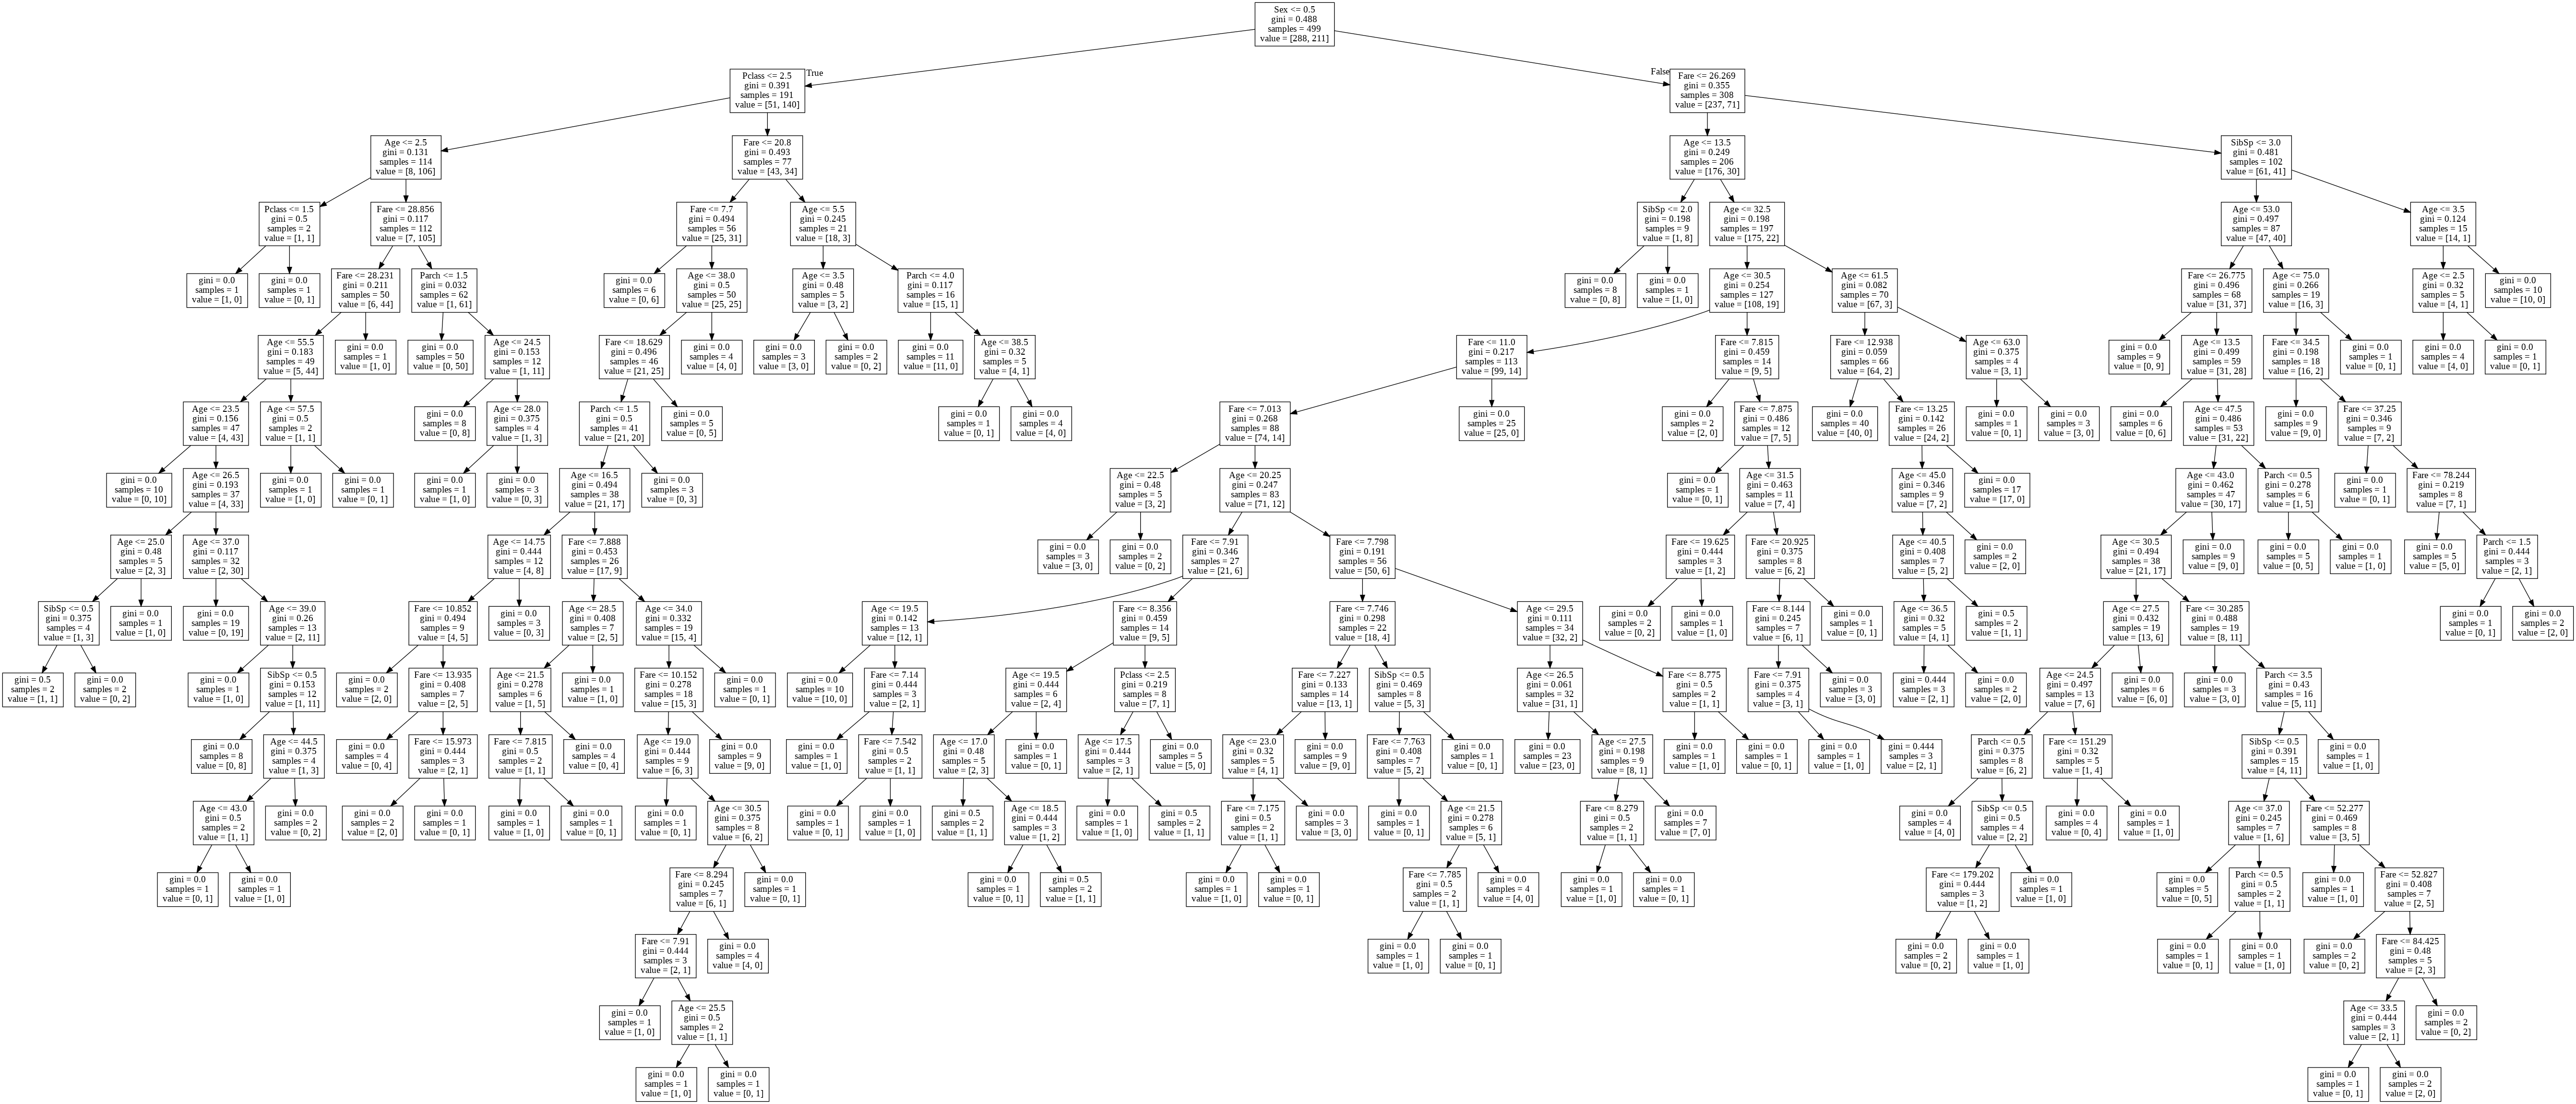

In [ ]:
# 아래 코드는 classifier 결정트리를 시각화해줍니다.
from sklearn.tree import export_graphviz # drawing graphs specified in DOT language scripts
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, feature_names=x_train.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

# 활동 6: 결정 트리 가지치기 (pruning)

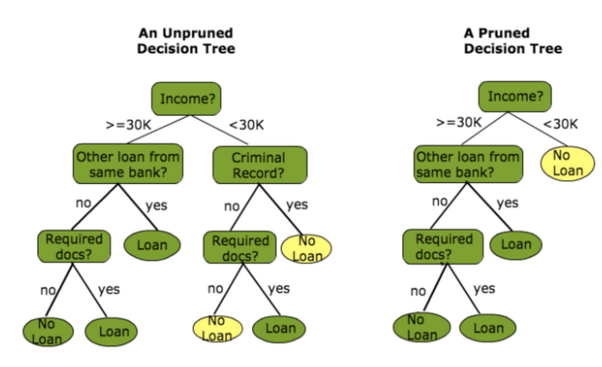

가지치기란 최대트리로 형성된 결정트리의 특정 노드 밑의 하부 트리를 제거하여 일반화 성능을 높히는 것을 의미합니다. 모든 끝노드의 불순도가 0인 트리를 full tree라고 하는데, 이 경우에는 분할이 너무 많이 과적합의 위험이 발생합니다. 과적합은 학습 데이터에 과하게 학습하여 실제 데이터에 오차가 증가하는 현상입니다. 이를 방지하기 위해서 적절한 수준에서 끝노드를 결합해주는 기법을 가지치기(pruning)이라고 합니다. 

이 활동에서는 scikit-learn으로 간단한 수준의 가지치기를 구현해보겠습니다.

In [ ]:
# 새로운 결정트리 오브젝트를 생성합니다. 이번에는 끝노드의 최대 개수를 지정해줍니다. (max_leaf_nodes) 
prune_classifier = DecisionTreeClassifier(max_leaf_nodes=45) 
prune_classifier.fit(x_train, y_train)
print(prune_classifier.score(x_test, y_test))

0.8418604651162791


이렇게 끝노드의 개수를 지정해주면 트리가 데이터에 더욱 잘 일반화되어 성능이 올라가는 것을 볼 수 있습니다.

가지치기된 트리를 시각화 해봅니다.

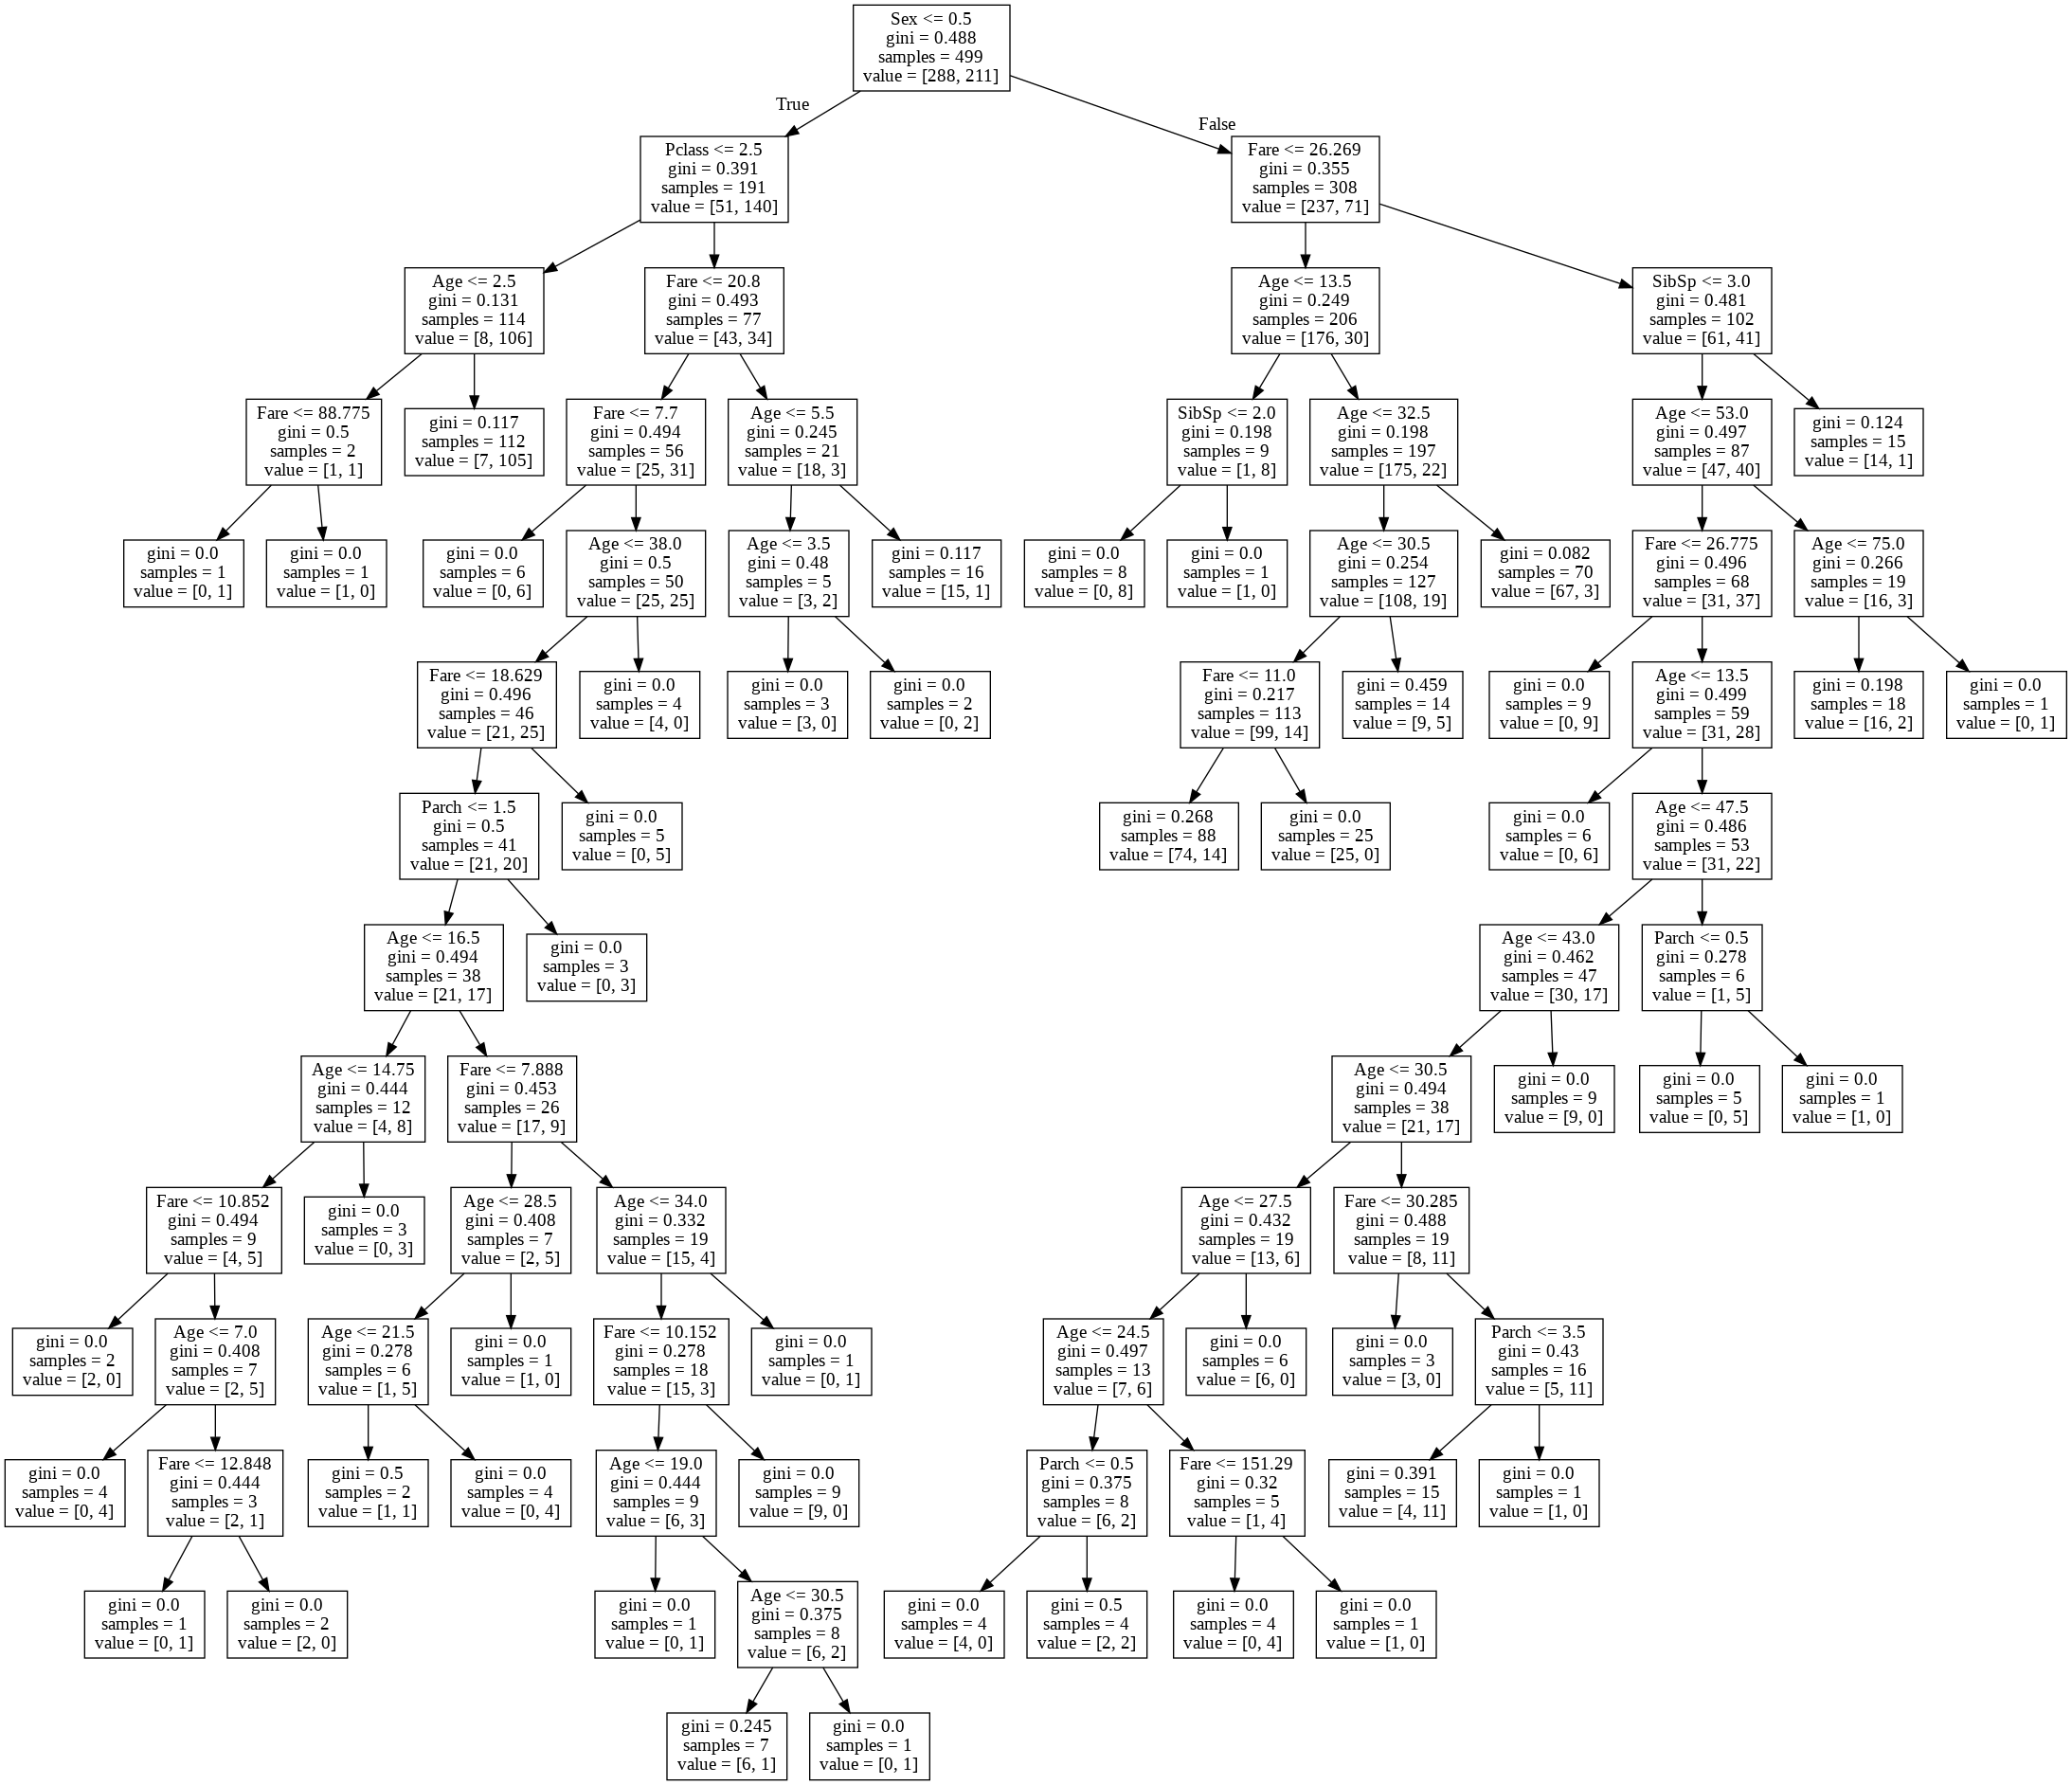

In [ ]:
dot_data = StringIO()
export_graphviz(prune_classifier, feature_names=x_train.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

# 과제(총 10점)

본 과제에서 사용할 데이터는 활동 5에서 사용한 titanic 데이터입니다.
위의 scikit-learn을 사용하여 구현해본 코드를 바탕으로 실시하시면 됩니다.

scikit-learn의 `DecisionTreeClassifier`에는 `max_leaf_nodes` 말고도 `max_depth`라는 파라미터가 있습니다. 이 파라미터는 결정트리의 최대 깊이(depth)를 지정합니다. 

[다큐멘테이션](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

* 과제 1(각 파라미터의 설명당 0.5점씩 총 2.5점): 

    위 제공된 링크의 `DecisionTreeClassifier` 다큐멘테이션을 읽고 max_leaf_nodes, max_depth, min_sample_split, min_sample_leaf, min_impurity_decrease 각각의 파라미터가 pruning에 있어서 어떤 역할을 하는지 간단히 설명하시오.

* 과제 2(각 트리별 조건 수행 시 0.5점, 총 2.5점): 

    scikit-learn의 `DecisionTreeClassifier`을 사용하여 총 5개의 새로운 결정트리 모델을 생성해봅시다. 
    
    이 때 각각의 결정트리 모델은 max_leaf_nodes, max_depth, min_sample_split, min_sample_leaf, min_impurity_decrease의 다섯 pruning 파라미터 중 하나씩을 임의로 조정해주어야 합니다.(하나의 결정 트리는 하나의 pruning 파라미터만 조정하면 되고, 각각의 결정트리는 서로 다른 파라미터를 조정해야합니다.)

* 과제 3(각 트리에 대한 조건 수행 시 0.5점, 총 2.5점): 

    pruning 파라미터를 조정한 5개의 결정트리에 대해 테스트셋에 대한 분류 정확도를 확인해보고, pruning 파라미터를 조정하지 않았던 결정트리의 분류 정확도와 비교해봅시다.


* 과제 4(시각화 하나당 0.5점씩, 총 2.5점):

    생성된 5개의 결정트리 모델 각각을 시각화해봅시다.

과제 1
1. max_leaf_nodes: leaf_node, 즉 결정된 클래스의 값의 최대 개수를 조정한다. Default 값은 무제한이다.
2. max_depth: 트리의 최대 깊이. Default값이 None으로 설정되어 있으면, 완벽하게 또는 data의 개수가 min_spample_split보다 작아질 때까지 분할을 한다. Depth가 깊어지면 overfitting 될 가능성이 있다. 
3. min_samples_split: Node를 split하기 위한 최소한의 sample 개수를 의미한다. Default 값이 작아 질수록 Overfitting을 할 가능성이 크고 따라서 overfitting을 control하기 위해 사용한다. int일 경우에는 최소 개수, float일 경우에는 fraction을 반환한다.
4. min_samples_leaf: Leaf가 되기 위해 필요한 최소한의 sample data 개수를 의미한다. split point를 결정할 때 최소한 min_samples_leaf가 있는지 확인하고 min_samples_split과 함께 overfitting을 control할 때 사용을 한다. 마찬가지로 int일 경우에는 최소 개수, float일 경우에는 fraction을 반환한다.
5. min_impurity_decrease: 여기서 설정한 impurity 값 이상으로 어떠한 node의 impurity가 감소할 경우 node를 split한다. Impurity 값이 낮을수록 tree의 성능이 좋아진다. Default 값은 0이다.

In [ ]:
#과제2 max_leaf_nodes
classifier_max_leaf_nodes = DecisionTreeClassifier(max_leaf_nodes=25) 
classifier_max_leaf_nodes.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#과제2 max_depth
classifier_max_depth = DecisionTreeClassifier(max_depth=6)
classifier_max_depth.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#과제2 min_samples_split
classifier_min_samples_split = DecisionTreeClassifier(min_samples_split=60) #min_samples_split
classifier_min_samples_split.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=60,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#과제2 min_samples_leaf
classifier_min_samples_leaf = DecisionTreeClassifier(min_samples_leaf = 30) #min_samples_leaf
classifier_min_samples_leaf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#과제2 min_impurity_decrease
classifier_min_impurity_decrease = DecisionTreeClassifier(min_impurity_decrease = 0.1)
classifier_min_impurity_decrease.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#과제3 compare accuracy
print("Accuracy non-pruning:", classifier.score(x_test, y_test))
print("Accuracy max_leaf_node:", classifier_max_leaf_nodes.score(x_test, y_test))
print("Accuracy max_depth:", classifier_max_depth.score(x_test, y_test))
print("Accuracy min_samples_split:", classifier_min_samples_split.score(x_test, y_test))
print("Accuracy min_samples_leaf:", classifier_min_samples_leaf.score(x_test, y_test))
print("Accuracy min_impurity_decrease:", classifier_min_impurity_decrease.score(x_test, y_test))

Accuracy non-pruning: 0.813953488372093
Accuracy max_leaf_node: 0.8372093023255814
Accuracy max_depth: 0.8465116279069768
Accuracy min_samples_split: 0.8651162790697674
Accuracy min_samples_leaf: 0.8232558139534883
Accuracy min_impurity_decrease: 0.8372093023255814


과제3 결론:
1. max_leaf_nodes 는 25개로 제한을 두었고, max_depth 또한 무제한에서 6로 제한을 두었다. 그 결과 pruning parameter를 조정하지 않은 모델보다 accuracy에서 성능이 향상 되었다. 결과적으로 overfitting 하는 것을 막을 수 있었다. 
2. Min_samples_leaf 나 min_samples_split는 작게 설정할수록 분할하는 노드가 많아져 overfitting 되는 가능성이 높기 때문에 defalut 값인 1과2에서 30 과 60으로 증가를 시켜주었고 그 결과 pruning parameter를 조정하지 않은 모델보다 accuracy에서 성능이 향상 되었다.
3. Min_impurity_decrease 값은 0.1로 설정했는데, default 값인 0.0보다 좋은 accuracy를 보여주었다

결론: 결과적으로 pruning parameter를 조정한 모델트리들이 pruning을 안한 모델 트리보다 좋은 성능을 보였고, min_samples_split를 조정한 모델트리가 그 중 가장 좋은 성능(accuracy)를 보였다.

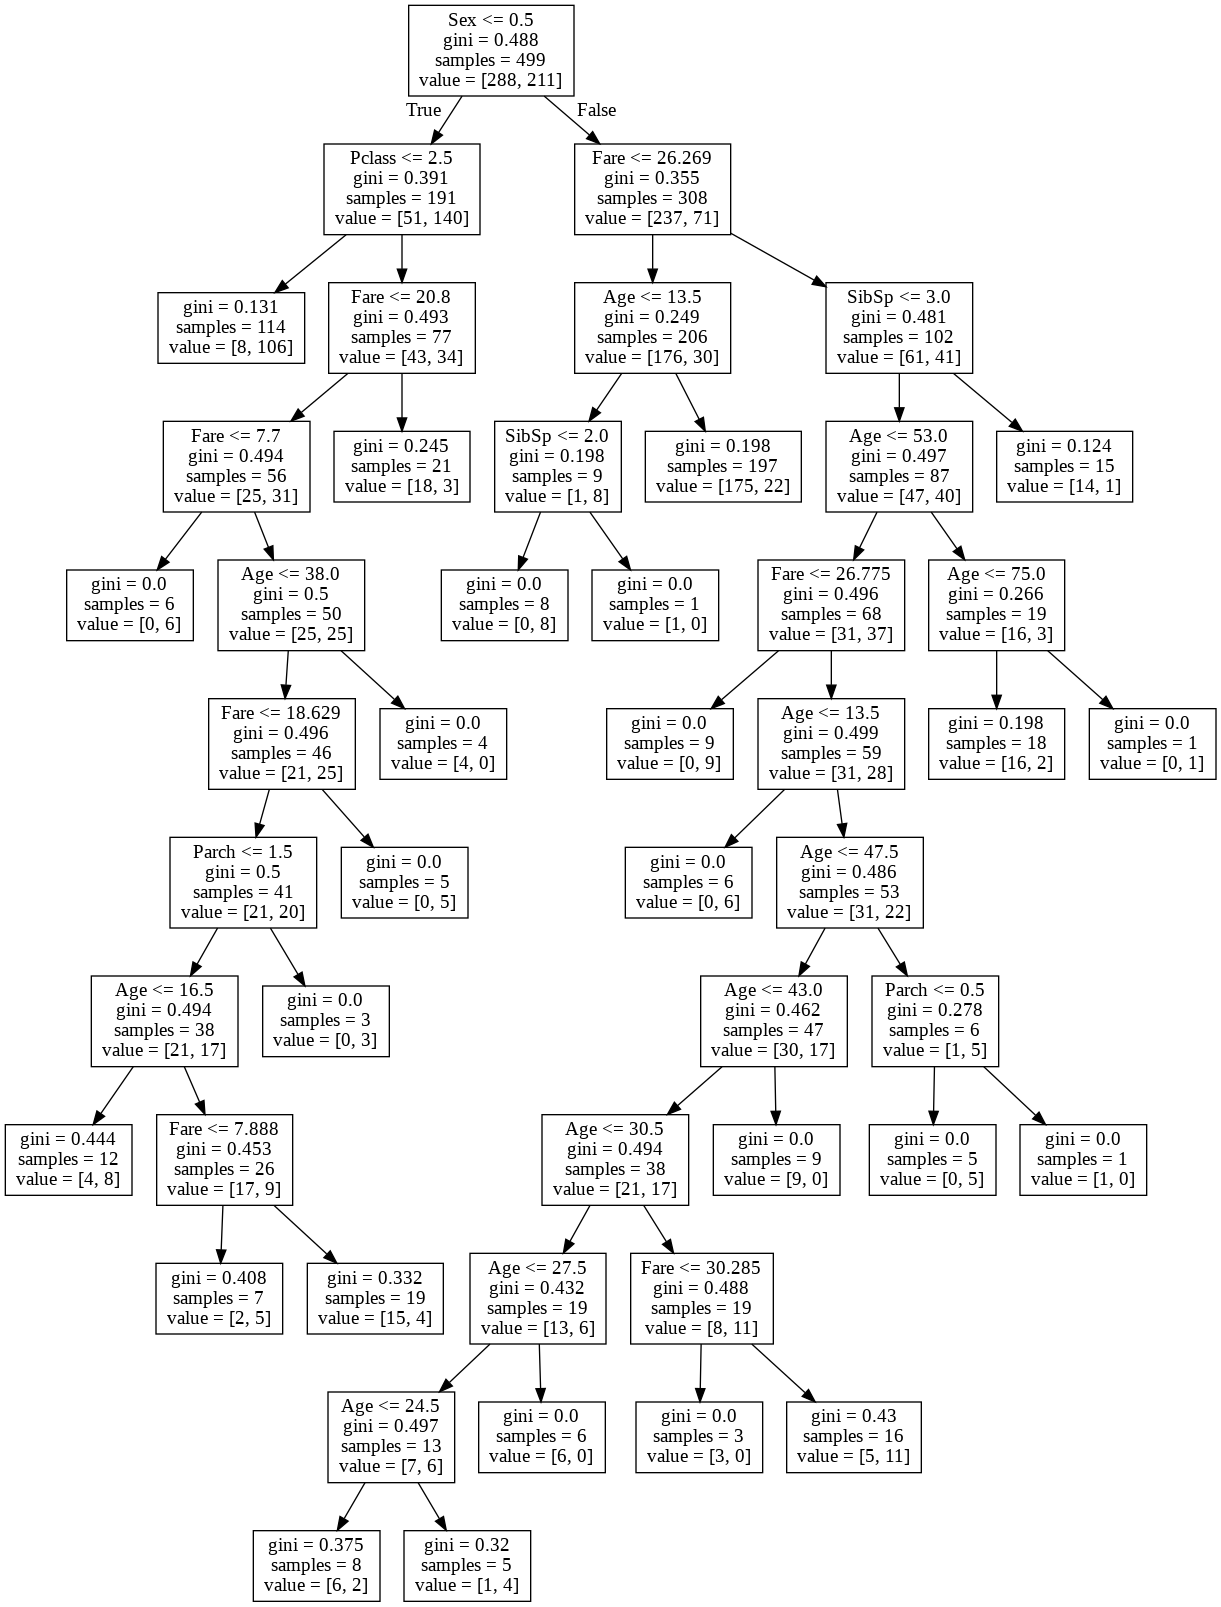

In [ ]:
#과제4 max_leaf_nodes
dot_data = StringIO()
export_graphviz(classifier_max_leaf_nodes, feature_names=x_train.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

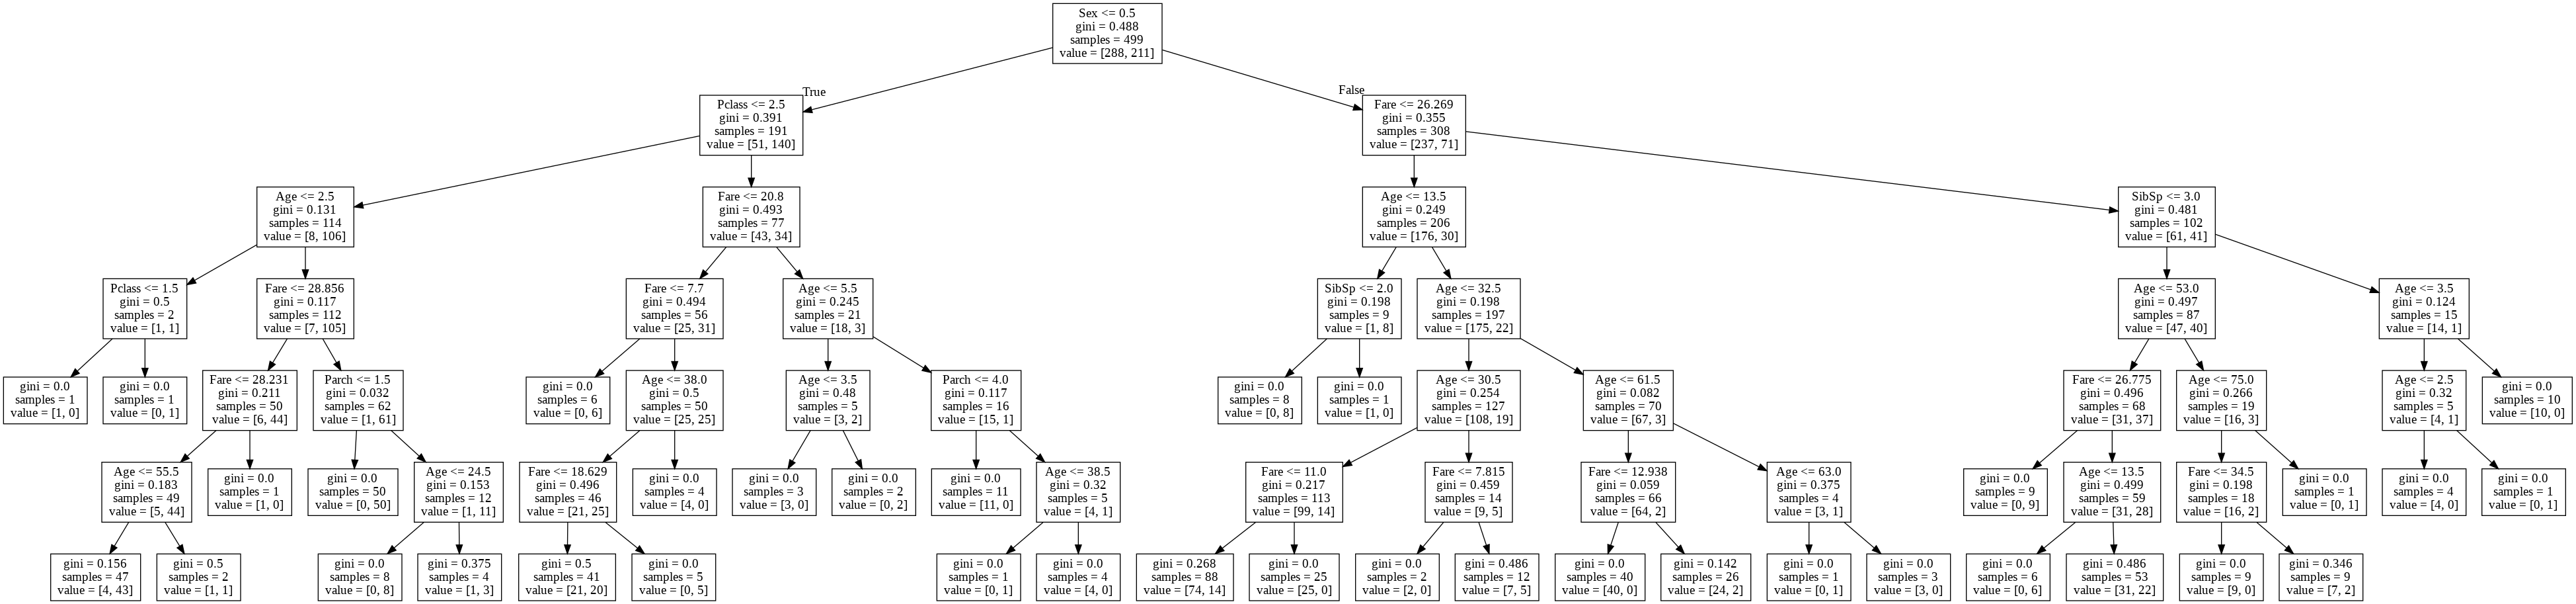

In [ ]:
#과제4 max_depth
dot_data = StringIO()
export_graphviz(classifier_max_depth, feature_names=x_train.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

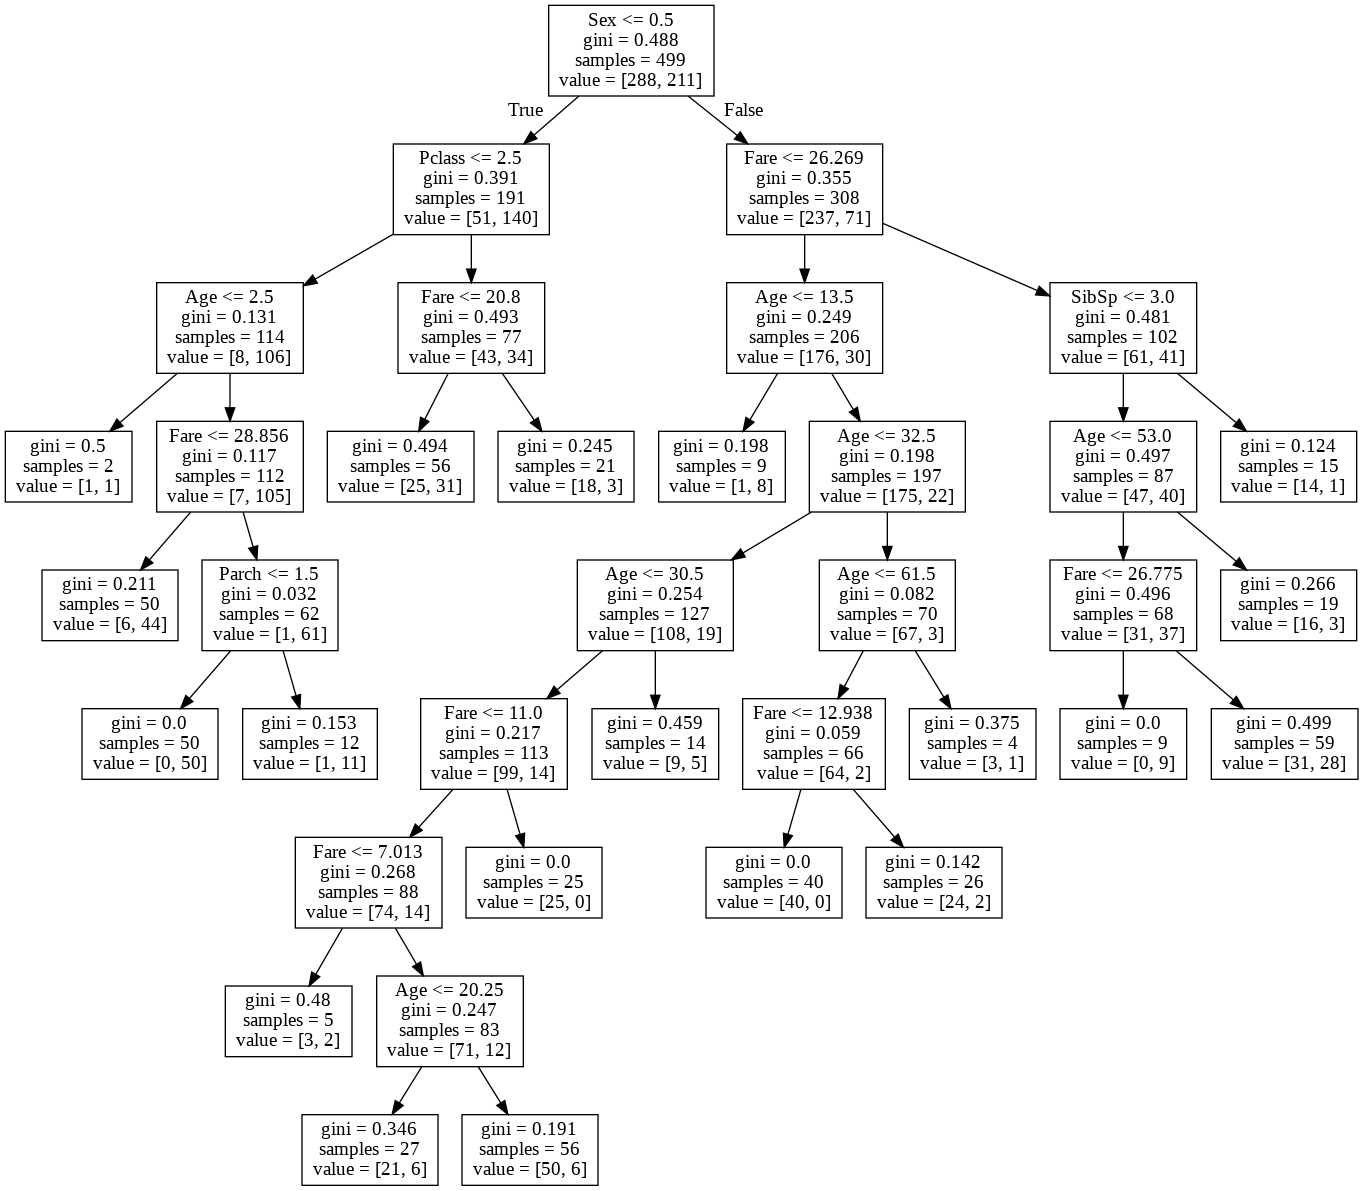

In [ ]:
#과제4 min_samples_split
dot_data = StringIO()
export_graphviz(classifier_min_samples_split, feature_names=x_train.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

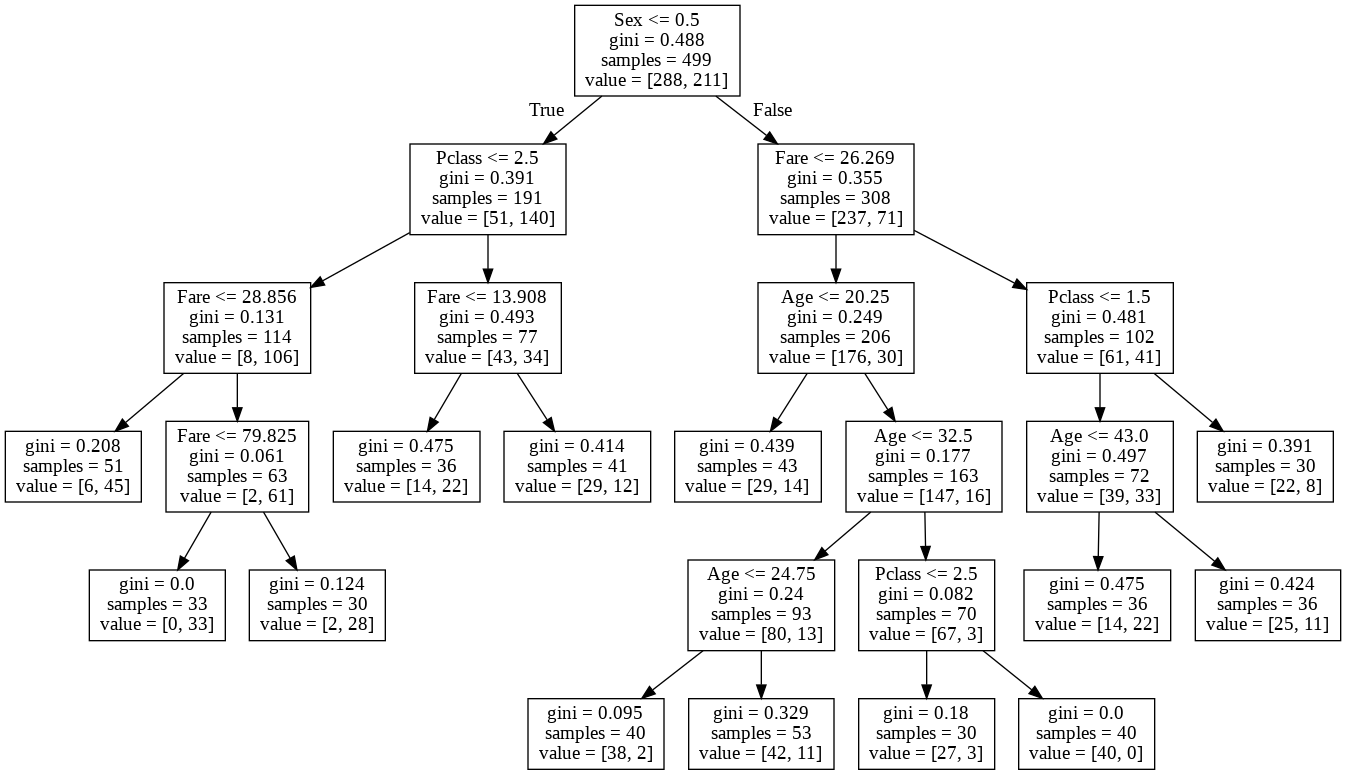

In [ ]:
#과제4 min_samples_leaf
dot_data = StringIO()
export_graphviz(classifier_min_samples_leaf, feature_names=x_train.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

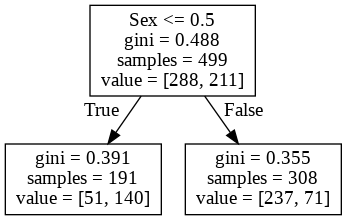

In [ ]:
#과제4 min_impurity_decrease
dot_data = StringIO()
export_graphviz(classifier_min_impurity_decrease, feature_names=x_train.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())